In [1]:
# Importing required libraries or dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Indian automoble buying behavour study 1.0.csv')
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
data['Make'].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

In [4]:
data['Age'].unique()

array([27, 35, 45, 41, 31, 28, 33, 34, 29, 30, 49, 26, 37, 36, 43, 42, 32,
       44, 39, 46, 50, 51], dtype=int64)

# Exploratory Data Analysis (EDA)

In [5]:
data.shape

(99, 13)

In [6]:
# Checking info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [7]:
#getting statistical summary
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


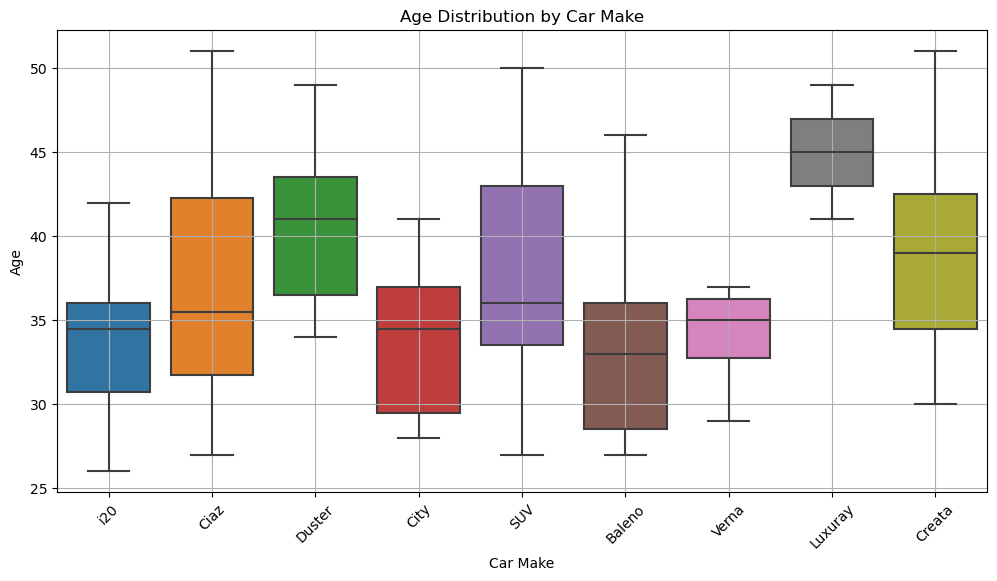

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Age', data=data)
plt.title('Age Distribution by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observation:** Graph shows agewise buying behaviour of customers

In [9]:
data['Total Salary'].unique()

array([ 800000, 2000000, 1800000, 2200000, 2600000,  900000, 1400000,
       1900000, 1700000, 1300000, 4500000, 2500000, 2400000, 2900000,
       1600000, 2700000, 1100000, 2100000, 3000000, 3700000, 2300000,
       3600000,  200000, 3100000, 4300000, 3800000, 4700000, 1200000,
       1500000, 4000000, 3200000, 5200000, 4100000, 4900000, 2800000,
       5100000], dtype=int64)

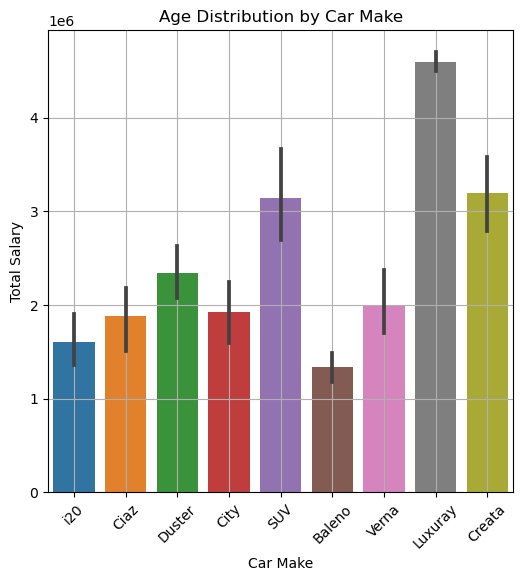

In [10]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Make', y='Total Salary', data=data)
plt.title('Age Distribution by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observation:** In y-axis shows customers salary in 10lacks i.e. 1=10^6, 2=10^6 and so on.This shows buying bahaviour of customers with respect to total salary earned.
    

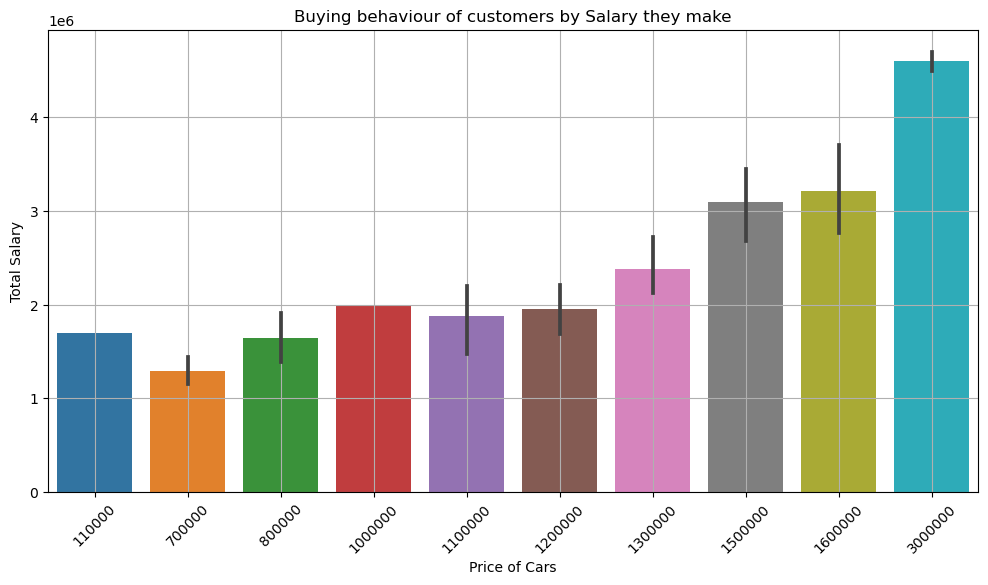

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Total Salary', data=data)
plt.title('Buying behaviour of customers by Salary they make')
plt.xlabel('Price of Cars')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

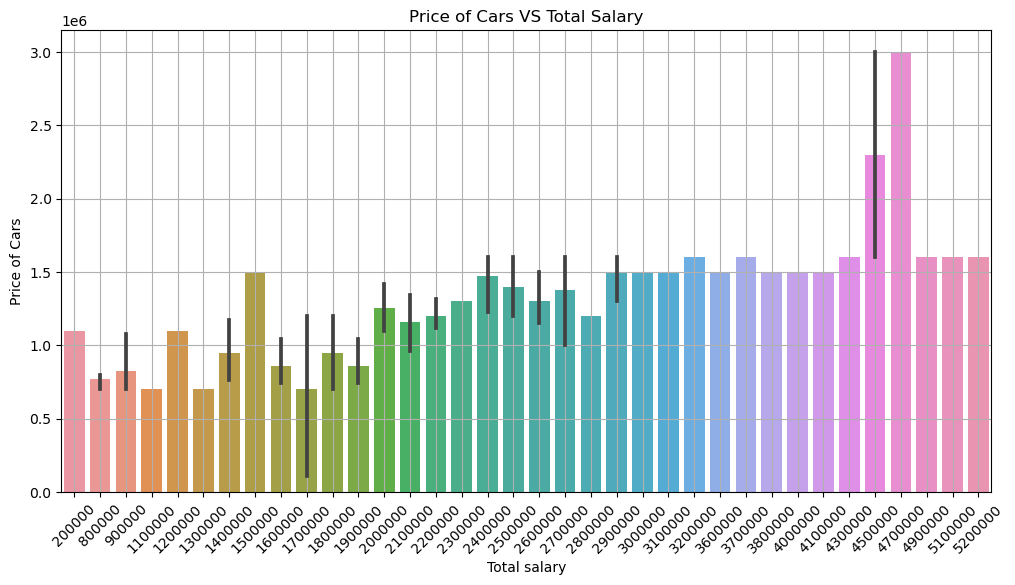

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Salary', y='Price', data=data)
plt.title('Price of Cars VS Total Salary')
plt.xlabel('Total salary')
plt.ylabel('Price of Cars')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Model Building using K-means

In [13]:
# Select numerical and categorical columns
numerical_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
categorical_cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

In [14]:
# Apply Standard Scaling to numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [15]:
# Apply One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [16]:
X = data.drop('Price', axis=1)
y = data['Price']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Re-scale numerical columns to ensure they're on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
data.head()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,...,Wife Working_Yes,Wife Working_m,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20
0,-1.498630,-1.642313,-1.397118,-0.887055,-1.406760,-0.904843,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.211304,-0.136859,-0.501877,0.108995,-0.258937,-0.445579,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1.397855,1.368594,0.094950,-0.887055,-0.450240,0.013685,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.754191,0.615867,-0.203464,0.108995,-0.067633,0.013685,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,-0.854967,-0.136859,0.094950,0.441012,0.314975,0.932213,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0


In [19]:
# Initialize PCA and fit to the scaled data
pca = PCA()
pca.fit(X_scaled)

# Determine the amount of variance explained by each component
explained_variance = pca.explained_variance_ratio_

In [20]:
# Select number of components to retain 95% variance
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Re-fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [21]:
print(n_components)

15


In [22]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10','PC11', 'PC12','PC13','PC14','PC15'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-4.015228,-0.513342,-2.342985,-0.031200,-0.776410,1.276011,-0.258212,1.244125,0.631100,-0.169052,0.687187,-0.432904,0.072043,0.386013,1.097713
1,-0.119408,1.444260,-0.990998,-0.602196,1.074332,-1.241984,0.195651,-0.697451,0.316905,-1.863602,1.499267,-0.386348,-1.276897,0.448532,0.062579
2,-0.027553,3.175702,2.559216,0.251380,-0.061271,1.068659,-1.150050,0.842812,-1.270292,0.571125,1.179331,1.671393,-0.004356,-0.573971,0.387108
3,0.325758,-0.978807,1.846847,-0.522031,-1.482397,-1.066572,0.810166,0.343598,-0.753409,-1.025215,-1.690308,0.194528,-1.038964,0.380430,0.803148
4,0.736698,-0.973546,-1.165020,-0.094897,0.411676,1.125754,1.095356,-0.734320,-0.318211,-0.553814,0.759471,-0.145424,-0.727466,-1.086736,0.954548


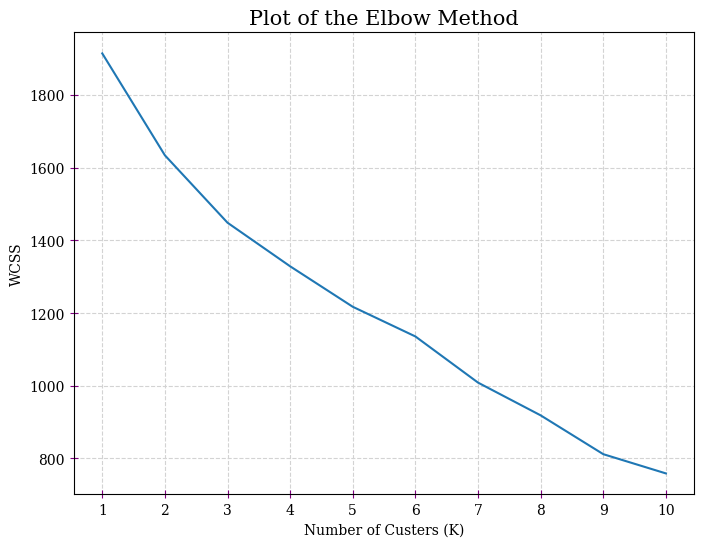

In [23]:
import warnings
warnings.filterwarnings('ignore')

# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [24]:
# training the model using k=3 as rendered by the above plot
kmean = KMeans(n_clusters=3, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=3, random_state=90)

In [25]:
# check the labels assigned to each data point
print(kmean.labels_)

[2 0 0 0 1 0 0 0 0 0 1 0 2 2 0 1 2 2 2 2 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 2
 2 2 2 0 2 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 2 2 2 2 2 2 0 0 0 1 0 1 0 0 1 0 1
 2 1 0 1 1 1 0 1 0 0 0 0 2 0 1 0 0 1 0 2 2 1 0 1 0]


In [26]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    47
1    30
2    22
dtype: int64

In [27]:
# adding a new feature of cluster labels to the dataset 3
data['clusters'] = kmean.labels_

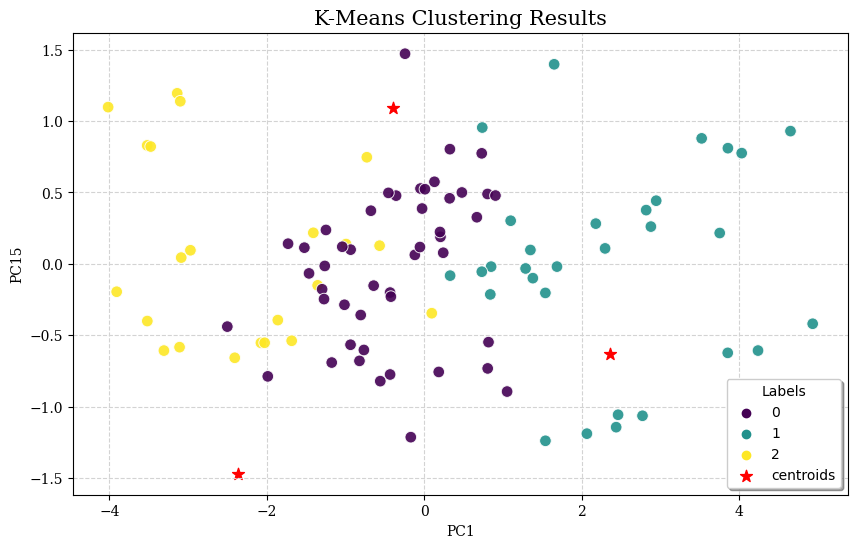

In [28]:
# visualizing clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC15', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=10)
plt.ylabel('PC15', family='serif', size=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True, loc= 'lower right')
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()